# Final Project

# Name: Satyajit Das 
# Roll No:19281




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv


pokemon = pd.read_csv("pokemon_data.csv")

# Data Preparation

In [2]:
pokemon.drop(['Generation'],inplace=True,axis=1)
pokemon.rename(columns={'#':'id'},inplace=True)
pokemon['Type 2'] = pokemon['Type 2'].fillna('None')
pokemon.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         800 non-null    int64 
 1   Name       799 non-null    object
 2   Type 1     800 non-null    object
 3   Type 2     800 non-null    object
 4   HP         800 non-null    int64 
 5   Attack     800 non-null    int64 
 6   Defense    800 non-null    int64 
 7   Sp. Atk    800 non-null    int64 
 8   Sp. Def    800 non-null    int64 
 9   Speed      800 non-null    int64 
 10  Legendary  800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 63.4+ KB


In [3]:
pokemon['Name'] = pokemon['Name'].fillna('Primeape')
pokemon['Type 1'] = pokemon['Type 1'].replace('Fighting', 'Fight')
pokemon['Type 2'] = pokemon['Type 2'].replace('Fighting', 'Fight')
pokemon_df = pokemon.copy()
pokemon.head()

,id,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,None,39,52,43,60,50,65,False


In [4]:
pokemon.drop(["id"],inplace=True,axis=1)
pokemon.drop(["Type 2"],inplace=True,axis=1)
pokemon.head()

,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,Bulbasaur,Grass,45,49,49,65,65,45,False
1,Ivysaur,Grass,60,62,63,80,80,60,False
2,Venusaur,Grass,80,82,83,100,100,80,False
3,Mega Venusaur,Grass,80,100,123,122,120,80,False
4,Charmander,Fire,39,52,43,60,50,65,False


In [5]:
pokemon['Total']= pokemon['HP']+pokemon['Attack']+pokemon['Defense']+pokemon['Sp. Atk']+pokemon['Sp. Def']+pokemon['Speed']
pokemon.head()

,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Total
0,Bulbasaur,Grass,45,49,49,65,65,45,False,318
1,Ivysaur,Grass,60,62,63,80,80,60,False,405
2,Venusaur,Grass,80,82,83,100,100,80,False,525
3,Mega Venusaur,Grass,80,100,123,122,120,80,False,625
4,Charmander,Fire,39,52,43,60,50,65,False,309


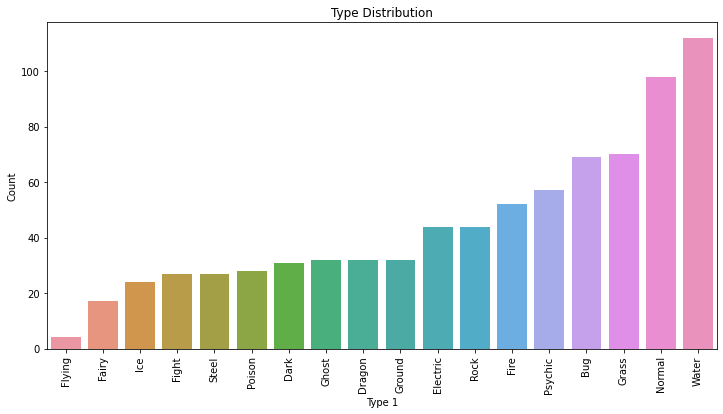

In [6]:
pokemon1 = pokemon.groupby('Type 1')['Type 1'].count().reset_index(name = 'Count')
pokemon1 = pokemon1.sort_values(by = 'Count')
plt.figure(figsize=(12,6))
sns.barplot(x=pokemon1['Type 1'], y= pokemon1['Count'])
plt.xticks(rotation= 90)
plt.xlabel('Type 1')
plt.ylabel('Count')
plt.title('Type Distribution')
plt.show()

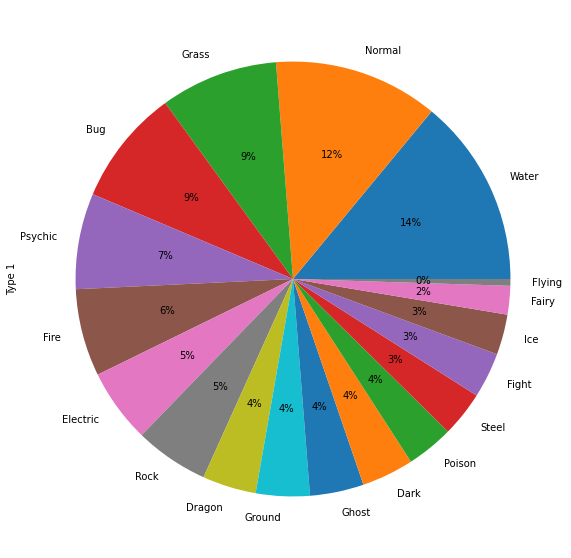

In [7]:
plt.figure(figsize=(10,10))
labels = pokemon['Type 1'].value_counts().index
pokemon['Type 1'].value_counts().plot(kind='pie', labels=labels, autopct='%1.0f%%')
plt.show()

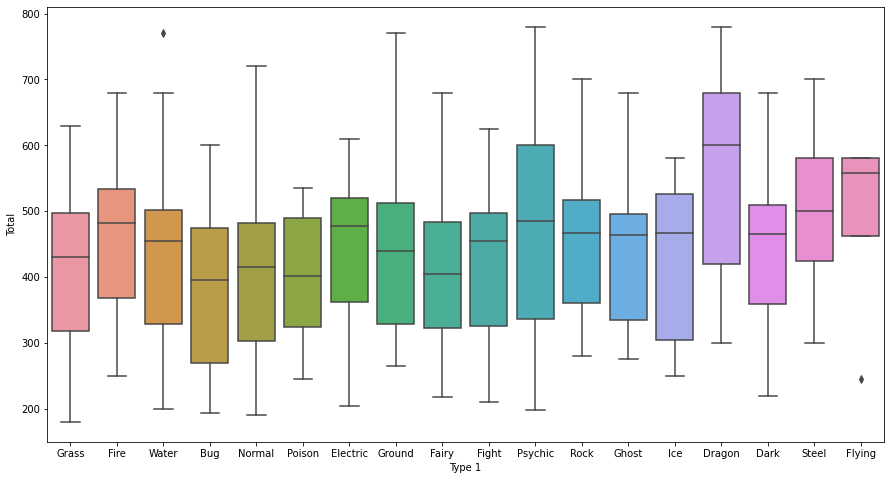

In [8]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x = 'Type 1', y = 'Total', data = pokemon )
plt.show()

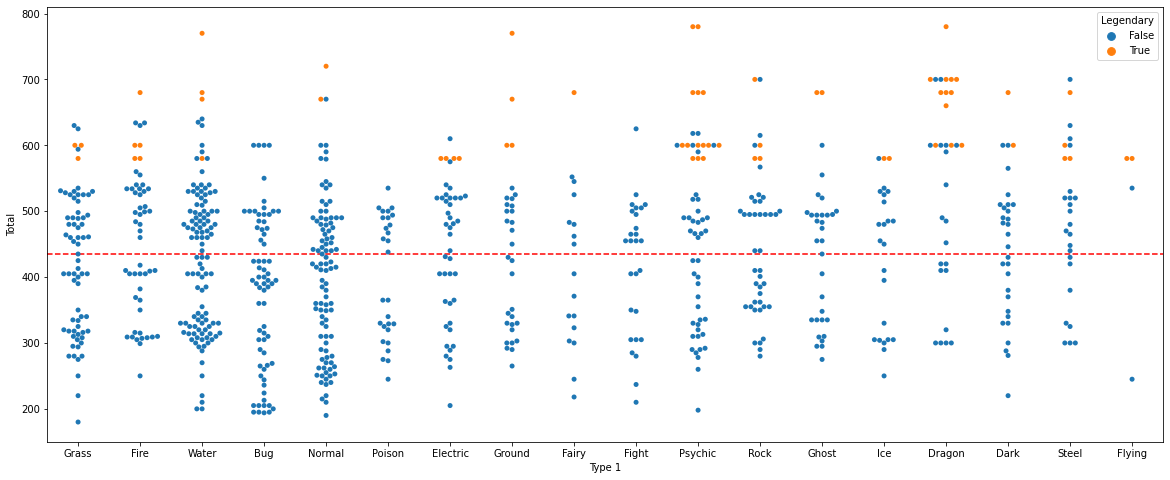

In [9]:
plt.figure(figsize=(20,8))
sns.swarmplot(x='Type 1', y='Total', data=pokemon, hue='Legendary')
plt.axhline(pokemon['Total'].mean(), color='red', linestyle='dashed')
plt.show()

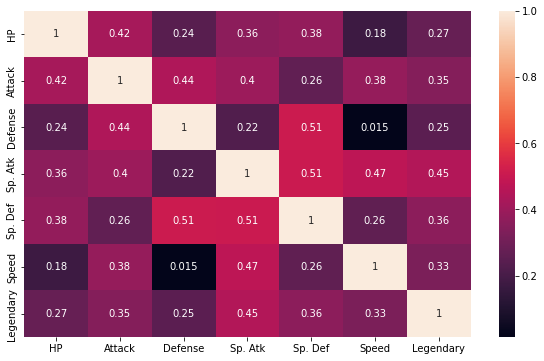

In [10]:
pokemon.drop(["Total"],inplace=True,axis=1)
plt.figure(figsize=(10,6))
sns.heatmap(pokemon.corr(),annot=True)
plt.show()

In [11]:
pokemon['Legendary'] = np.where(pokemon['Legendary'] == True, 1, 0)


## Predicting the Winner of the Combats


## Loading datasets for Winner Prediction

In [12]:
tests = pd.read_csv("test.csv")
combats = pd.read_csv("combats.csv")

## Data Preperation

In [13]:
#Changing the Winner with 0 and 1
#if winner is first Pokemon then Winner is 0 else 1
combats.Winner[combats.Winner == combats.First_pokemon] = 0
combats.Winner[combats.Winner == combats.Second_pokemon] = 1

print(combats.head(5))

   First_pokemon  Second_pokemon  Winner
0            266             298       1
1            702             701       1
2            191             668       1
3            237             683       1
4            151             231       0


In [14]:
#creating Dictonaries for type and stats
#Type Dict will have type 1 and type 2 while stats will have the rest of the stats data

type_dic = pokemon_df.iloc[:,0:4]
type_dic=type_dic.drop("Name", axis=1)
type_dic.head()
stats_dic = pokemon_df.drop(['Name','Type 1','Type 2'],axis=1)

type_dict = type_dic.set_index('id').T.to_dict('list')
stats_dict = stats_dic.set_index('id').T.to_dict('list')

# Feature Engineering

In [15]:

def replace(data):
    data['First_pokemon_stats'] = data.First_pokemon.map(stats_dict)
    data['Second_pokemon_stats']= data.Second_pokemon.map(stats_dict)
    
    data['First_pokemon'] = data.First_pokemon.map(type_dict)
    data['Second_pokemon'] = data.Second_pokemon.map(type_dict)
    
    
    return data

In [16]:
#stats_diff function will get the difference in stats of the first and the second pokemon and will give  a dataframe consisting of those differences
#taking the differnce would reduce the features while taking into account their effectiveness on the dataset
def stats_diff(data):
        stats_col=["HP_diff","Attack_diff","Defense_diff",'Sp.Atk_diff', 'Sp.Def_diff', 'Speed_diff', 'Legendary_diff']
        diff_list=[]
    
        for row in data.itertuples():
            diff_list.append(np.array(row.First_pokemon_stats) - np.array(row.Second_pokemon_stats))
        
        
        stats_df = pd.DataFrame(diff_list, columns=stats_col)
        data = pd.concat([data, stats_df], axis=1)
        data.drop(['First_pokemon_stats', 'Second_pokemon_stats'], axis=1, inplace=True)
        
        return data

In [17]:
# Dictionaries having effectiveness of different types of pokemon on each other.
#created 4 lists based on the types and their effectiveness on each other 
# the values in the lists starts with 1, if type is found in the very_effective dictionary then the value is multiplied by 2
#if value found in not_very_effective then value is divided by 2

def effectiveness(data):
    
    
    very_effective_dict = {'Normal': [],
                           'Fight': ['Normal', 'Rock', 'Steel', 'Ice', 'Dark'],
                           'Flying': ['Fight', 'Bug', 'Grass'],
                           'Poison': ['Grass', 'Fairy'],
                           'Ground': ['Poison', 'Rock', 'Steel', 'Fire', 'Electric'],
                           'Rock': ['Flying', 'Bug', 'Fire', 'Ice'],
                           'Bug': ['Grass', 'Psychic', 'Dark'],
                           'Ghost': ['Ghost', 'Psychic'],
                           'Steel': ['Rock', 'Ice', 'Fairy'],
                           'Fire': ['Bug', 'Steel', 'Grass', 'Ice'],
                           'Water': ['Ground', 'Rock', 'Fire'],
                           'Grass': ['Ground', 'Rock', 'Water'],
                           'Electric': ['Flying', 'Water'],
                           'Psychic': ['Fight', 'Poison'],
                           'Ice': ['Flying', 'Ground', 'Grass', 'Dragon'],
                           'Dragon': ['Dragon'],
                           'Dark': ['Ghost', 'Psychic'],
                           'Fairy': ['Fight', 'Dragon', 'Dark'],
                           'None': []}
    not_very_effective_dict = {'Normal': ['Rock', 'Steel'],
                               'Fight': ['Flying', 'Poison', 'Bug', 'Psychic', 'Fairy'],
                               'Flying': ['Rock', 'Steel', 'Electric'],
                               'Poison': ['Poison', 'Rock', 'Ground', 'Ghost'],
                               'Ground': ['Bug', 'Grass'],
                               'Rock': ['Fight', 'Ground', 'Steel'],
                               'Bug': ['Fight', 'Flying', 'Poison', 'Ghost', 'Steel', 'Fire', 'Fairy'],
                               'Ghost': ['Dark'],
                               'Steel': ['Steel', 'Fire', 'Water', 'Electric'],
                               'Fire': ['Rock', 'Fire', 'Water', 'Dragon'],
                               'Water': ['Water', 'Grass', 'Dragon'],
                               'Grass': ['Flying', 'Poison', 'Bug', 'Steel', 'Fire', 'Grass', 'Dragon'],
                               'Electric': ['Grass', 'Electric', 'Dragon'],
                               'Psychic': ['Steel', 'Psychic'],
                               'Ice': ['Steel', 'Fire', 'Water', 'Psychic'],
                               'Dragon': ['Steel'],
                               'Dark': ['Fight', 'Dark', 'Fairy'],
                               'Fairy': ['Posion', 'Steel', 'Fire'],
                               'None': []}

    
    pokemon1_type1=[]
    pokemon1_type2=[]
    pokemon2_type1=[]
    pokemon2_type2=[]
    
    
    for row in data.itertuples():
        nested_type =[[1,1], [1,1]]
        for i in range (0,2):
            for j in range (0,2):
                if row.Second_pokemon[j] in very_effective_dict.get(row.First_pokemon[i]):
                    nested_type[0][i] *=2
                if row.Second_pokemon[j] in not_very_effective_dict.get(row.First_pokemon[i]):
                    nested_type[0][i] /=2
                
                if row.First_pokemon[j] in very_effective_dict.get(row.Second_pokemon[i]):
                    nested_type[1][i] *=2
                if row.First_pokemon[j] in not_very_effective_dict.get(row.Second_pokemon[i]):
                    nested_type[1][i] /=2
                
                
        pokemon1_type1.append(nested_type[0][0])
        pokemon1_type2.append(nested_type[0][1])
        pokemon2_type1.append(nested_type[1][0])
        pokemon2_type2.append(nested_type[1][1])
        
        
    data = data.assign(P1_Type1=pokemon1_type1,P1_Type2=pokemon1_type2,P2_Type1=pokemon2_type1,P2_Type2=pokemon2_type2)
        
    data = data.drop(['First_pokemon', 'Second_pokemon'], axis=1)

    return data

In [18]:
train_df = replace(combats)
print(train_df.head(5))

     First_pokemon   Second_pokemon  Winner  \
0   [Rock, Ground]    [Grass, Dark]       1   
1   [Grass, Fight]    [Rock, Fight]       1   
2  [Fairy, Flying]  [Psychic, None]       1   
3     [Fire, None]   [Dragon, None]       1   
4    [Rock, Water]      [Bug, Rock]       0   

                 First_pokemon_stats              Second_pokemon_stats  
0    [50, 64, 50, 45, 50, 41, False]   [70, 70, 40, 60, 40, 60, False]  
1   [91, 90, 72, 90, 129, 108, True]  [91, 129, 90, 72, 90, 108, True]  
2   [55, 40, 85, 80, 105, 40, False]  [75, 75, 75, 125, 95, 40, False]  
3    [40, 40, 40, 70, 40, 20, False]  [77, 120, 90, 60, 90, 48, False]  
4  [70, 60, 125, 115, 70, 55, False]  [20, 10, 230, 10, 230, 5, False]  


In [19]:
train_df = stats_diff(train_df)
print(train_df.head(5))

     First_pokemon   Second_pokemon  Winner  HP_diff  Attack_diff  \
0   [Rock, Ground]    [Grass, Dark]       1      -20           -6   
1   [Grass, Fight]    [Rock, Fight]       1        0          -39   
2  [Fairy, Flying]  [Psychic, None]       1      -20          -35   
3     [Fire, None]   [Dragon, None]       1      -37          -80   
4    [Rock, Water]      [Bug, Rock]       0       50           50   

   Defense_diff  Sp.Atk_diff  Sp.Def_diff  Speed_diff  Legendary_diff  
0            10          -15           10         -19               0  
1           -18           18           39           0               0  
2            10          -45           10           0               0  
3           -50           10          -50         -28               0  
4          -105          105         -160          50               0  


In [20]:
train_df = effectiveness(train_df)
print(train_df.head(5))

   Winner  HP_diff  Attack_diff  Defense_diff  Sp.Atk_diff  Sp.Def_diff  \
0       1      -20           -6            10          -15           10   
1       1        0          -39           -18           18           39   
2       1      -20          -35            10          -45           10   
3       1      -37          -80           -50           10          -50   
4       0       50           50          -105          105         -160   

   Speed_diff  Legendary_diff  P1_Type1  P1_Type2  P2_Type1  P2_Type2  
0         -19               0       1.0       0.5       4.0       1.0  
1           0               0       2.0       2.0       0.5       1.0  
2           0               0       1.0       1.0       1.0       1.0  
3         -28               0       0.5       1.0       1.0       1.0  
4          50               0       2.0       2.0       1.0       1.0  


In [21]:
from sklearn.model_selection import train_test_split

y_train_full = train_df['Winner']
x_train_full = train_df.drop('Winner', axis=1)

from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(x_train_full, y_train_full, test_size=0.3, random_state=40)

## Creating Models to Predict 
Model would be selected based on the accuracy of the model

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn import svm
import warnings
warnings.filterwarnings("ignore")


clf_dict = {'log reg': LogisticRegression(), 
            'naive bayes Gaussian': GaussianNB(),
            'naive bayes Bernoulli': BernoulliNB(),
            'random forest': RandomForestClassifier(n_estimators=100),
            'knn': KNeighborsClassifier(),
            'Decision Tree': DecisionTreeClassifier(),
            'Svm': svm.SVC()}

for name, clf in clf_dict.items():
    model = clf.fit(x_train,y_train)
    pred = model.predict(x_cv)
    print('Accuracy of {}:'.format(name), accuracy_score(pred, y_cv))
    print(classification_report(y_cv, pred))

Accuracy of log reg: 0.8849333333333333
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      7107
           1       0.89      0.90      0.89      7893

    accuracy                           0.88     15000
   macro avg       0.88      0.88      0.88     15000
weighted avg       0.88      0.88      0.88     15000

Accuracy of naive bayes Gaussian: 0.8082666666666667
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      7107
           1       0.82      0.82      0.82      7893

    accuracy                           0.81     15000
   macro avg       0.81      0.81      0.81     15000
weighted avg       0.81      0.81      0.81     15000

Accuracy of naive bayes Bernoulli: 0.9324666666666667
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      7107
           1       0.95      0.92      0.93      7893

    accuracy                       

# Parameter Tuning

In [23]:
#Since Random Forest has the hightest Accuracy so I tried to get more accuracy by Tuning it's accuracy.
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [24]:
n_estimators_list = [160,190,220]
criterion_list = ['gini']
max_depth_list = [35,55]
min_samples_split_list = [0.001, 0.005]
min_samples_leaf_list = [0.001, 0.005]
max_features_list = ['log2']

params_grid = {
    'n_estimators': n_estimators_list,
    'criterion': criterion_list,
    'max_depth': max_depth_list,
    'min_samples_split': min_samples_split_list,
    'min_samples_leaf': min_samples_leaf_list,
    'max_features': max_features_list
}

num_combinations = 1
for k in params_grid.keys(): num_combinations *= len(params_grid[k])

print('Number of combinations = ', num_combinations)
params_grid

Number of combinations =  24


{'n_estimators': [160, 190, 220],
 'criterion': ['gini'],
 'max_depth': [35, 55],
 'min_samples_split': [0.001, 0.005],
 'min_samples_leaf': [0.001, 0.005],
 'max_features': ['log2']}

In [26]:
from sklearn.model_selection import GridSearchCV
def my_roc_auc_score(model, x_train, y_train): return metrics.roc_auc_score(y_cv, model.predict(x_cv))

model_rf = GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
                        param_grid=params_grid,
                        cv=3,
                        scoring=my_roc_auc_score,
                        return_train_score=True,
                        verbose=4)

model_rf.fit(x_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=160;, score=(train=nan, test=nan) total time=   3.3s
[CV 2/3] END criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=160;, score=(train=nan, test=nan) total time=   3.3s
[CV 3/3] END criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=160;, score=(train=nan, test=nan) total time=   3.3s
[CV 1/3] END criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=190;, score=(train=nan, test=nan) total time=   5.0s
[CV 2/3] END criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=190;, score=(train=nan, test=nan) total time=   5.2s
[CV 3/3] END criterion=gini, max_depth=35, max_feature

[CV 2/3] END criterion=gini, max_depth=55, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.005, n_estimators=160;, score=(train=nan, test=nan) total time=   3.1s
[CV 3/3] END criterion=gini, max_depth=55, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.005, n_estimators=160;, score=(train=nan, test=nan) total time=   3.3s
[CV 1/3] END criterion=gini, max_depth=55, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.005, n_estimators=190;, score=(train=nan, test=nan) total time=   4.6s
[CV 2/3] END criterion=gini, max_depth=55, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.005, n_estimators=190;, score=(train=nan, test=nan) total time=   4.5s
[CV 3/3] END criterion=gini, max_depth=55, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.005, n_estimators=190;, score=(train=nan, test=nan) total time=   4.4s
[CV 1/3] END criterion=gini, max_depth=55, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.005, n_es

GridSearchCV(cv=3, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini'], 'max_depth': [35, 55],
                         'max_features': ['log2'],
                         'min_samples_leaf': [0.001, 0.005],
                         'min_samples_split': [0.001, 0.005],
                         'n_estimators': [160, 190, 220]},
             return_train_score=True,
             scoring=<function my_roc_auc_score at 0x000001C921B36D30>,
             verbose=4)

In [27]:
model_rf.best_params_

{'criterion': 'gini',
 'max_depth': 35,
 'max_features': 'log2',
 'min_samples_leaf': 0.001,
 'min_samples_split': 0.001,
 'n_estimators': 160}

In [28]:
model_rf_fin = RandomForestClassifier(class_weight='balanced',
                                      criterion='gini',
                                      max_depth=35,
                                      max_features='log2',
                                      min_samples_leaf=0.001,
                                      min_samples_split=0.001,
                                      n_estimators=100)
model_rf_fin.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=35,
                       max_features='log2', min_samples_leaf=0.001,
                       min_samples_split=0.001)

In [29]:
from sklearn import metrics
print('Aucrracy= {:.4f}'.format(metrics.roc_auc_score(y_cv, model_rf_fin.predict(x_cv))))

Aucrracy= 0.9409


# Confusion Matrix

([<matplotlib.axis.YTick at 0x1c9205c41c0>,
 [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

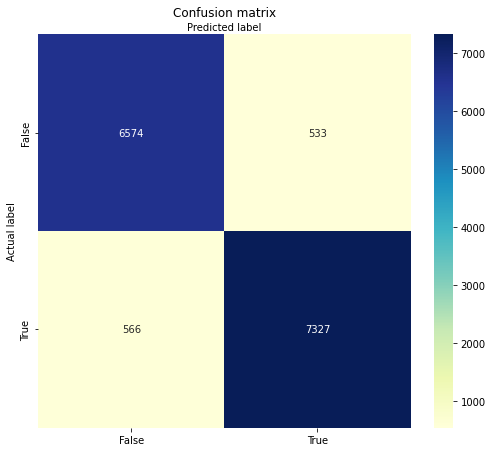

In [30]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_cv, pred)
%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Predicting the Winner 

In [31]:
#Found that Random forest fits well and used it to predict the tests dataset
prediction_df = tests.copy()
test_df = replace(tests)
test_df = stats_diff(test_df)
test_df = effectiveness(test_df)
print(test_df.head())
classifier = RandomForestClassifier(n_estimators=200)
model = classifier.fit(x_train_full, y_train_full)
prediction = model.predict(test_df)
prediction_df['Winner'] = prediction
prediction_df['Winner'][prediction_df['Winner'] == 0] = prediction_df['First_pokemon']
prediction_df['Winner'][prediction_df['Winner'] == 1] = prediction_df['Second_pokemon']
print(prediction_df)


   HP_diff  Attack_diff  Defense_diff  Sp.Atk_diff  Sp.Def_diff  Speed_diff  \
0      -10           37           -10            5            5          38   
1      -21            9            46          -11           51         -15   
2       29          -15            17          110          -30          14   
3       -5          -31           -12          -26           -7         -15   
4     -125          -15           -50           -9          -14           5   

   Legendary_diff  P1_Type1  P1_Type2  P2_Type1  P2_Type2  
0               0       1.0       1.0       1.0       1.0  
1               0       4.0       0.5       0.5       1.0  
2               1       1.0       2.0       0.5       1.0  
3               0       0.5       1.0       1.0       1.0  
4               0       1.0       1.0       1.0       1.0  
      First_pokemon  Second_pokemon  Winner
0               129             117     129
1               660             211     211
2               706             1

In [32]:
prediction_df.to_csv('prediction.csv', index=False)

In [33]:
df_saved_file = pd.read_csv('prediction.csv')
df_saved_file

,First_pokemon,Second_pokemon,Winner
0,129,117,129
1,660,211,211
2,706,115,706
3,195,618,618
4,27,656,27
...,...,...,...
9995,216,498,498
9996,113,404,404
9997,493,104,493
9998,643,259,643
